# 股价分析与预测

## fbprophet：时间序列预测神器！

https://facebook.github.io/prophet/

比较主流的观点认为，时间序列受四种成分影响：

- 趋势：宏观、长期、持续性的作用力，比如我国房地产价格；

- 周期：比如商品价格在较短时间内，围绕某个均值上下波动；

- 季节：变化规律相对固定，并呈现某种周期特征。比如每年国内航班的旅客数、空调销售量、每周晚高峰时间等。“季节”不一定按年计。每周、每天的不同时段的规律，也可称作季节性。

- 随机：随机的不确定性，比如10分钟内A股的股指变化，也是人们常说的随机过程(Stochastic Process）

主流时间序列算法：自回归、移动平均和整合模型

Prophet的亮点

并不是所有问题都可以用同样的程序解决。Prophet所针对的，是Facebook的商业预测任务，这些任务一般具有以下特征：

- 按小时、日、周的观测值，至少是几个月的历史数据（最好是一年）；
- 多种和人类活动相关的强周期性：比如每周的某日，一年中的某个时间；
- 按不确定间隔出现，已知的重要节假日，比如超级碗（Super Bowl)；
- 合理数量的空白观测值或异常值；
- 时间趋势会转折，比如新产品发布；
- 非线性增长的趋势，比如到达了某种自然局限或饱和。


In [1]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

先来安装好我们的工具

* pip install quandl获取数据集
* pip install fbprophet数据分析工具  https://pypi.python.org/pypi/fbprophet/  python setup.py install
* pip install pytrends  

In [2]:
from stocker import Stocker

ModuleNotFoundError: No module named 'quandl'

## 相关函数都在Stocker里面啦，输入你想要的股票名字就好！

In [ ]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 to 2018-01-24.


看看我们的数据长什么样吧！

In [ ]:
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


## 画一下我们数据的收盘价情况吧！

Maximum Adj. Close = 91.90 on 2018-01-23.
Minimum Adj. Close = 0.06 on 1986-03-24.
Current Adj. Close = 91.90 on 2018-01-23.



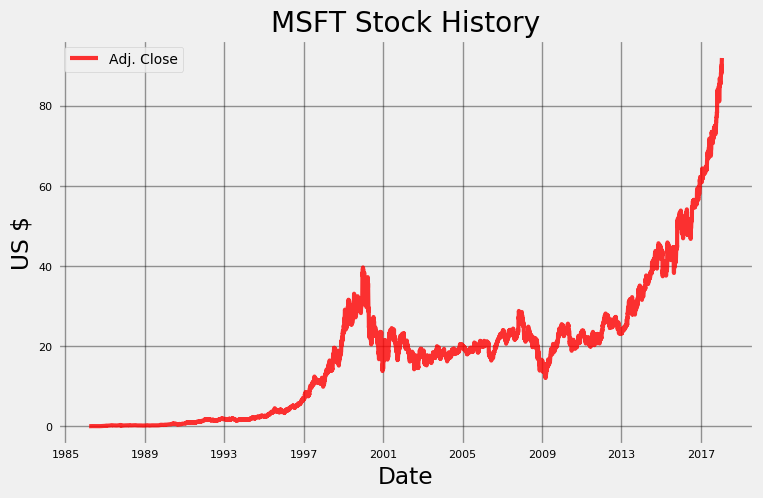

In [ ]:
microsoft.plot_stock()

再来看一下Daily Change的情况！

Maximum Daily Change = 2.08 on 2008-10-13.
Minimum Daily Change = -3.34 on 2017-12-04.
Current Daily Change = 1.61 on 2018-01-22.

Maximum Adj. Volume = 591052200.00 on 2006-04-28.
Minimum Adj. Volume = 7425503.00 on 2017-11-24.
Current Adj. Volume = 23190700.00 on 2018-01-22.



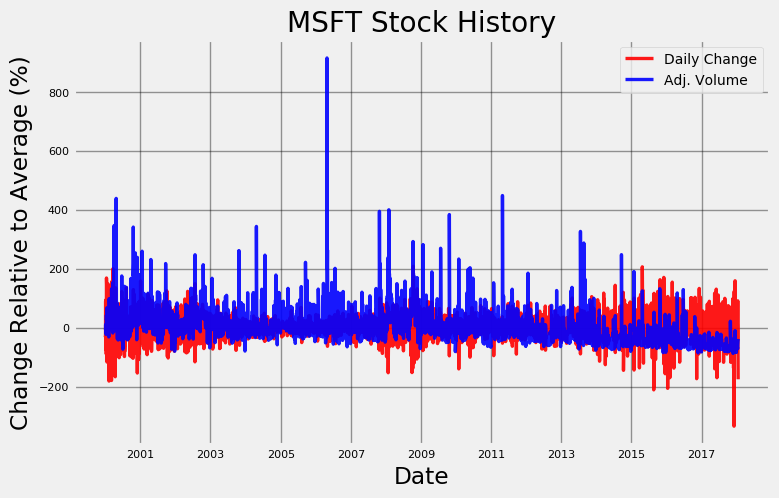

In [ ]:
microsoft.plot_stock(start_date = '2000-01-03', end_date = '2018-01-16', 
                     stats = ['Daily Change', 'Adj. Volume'], plot_type='pct')

## 盈利的情况，假如买了100万股，我现在就不录课了。。。

MSFT Total buy and hold profit from 1986-03-13 to 2018-01-16 for 100 shares = $8829.11


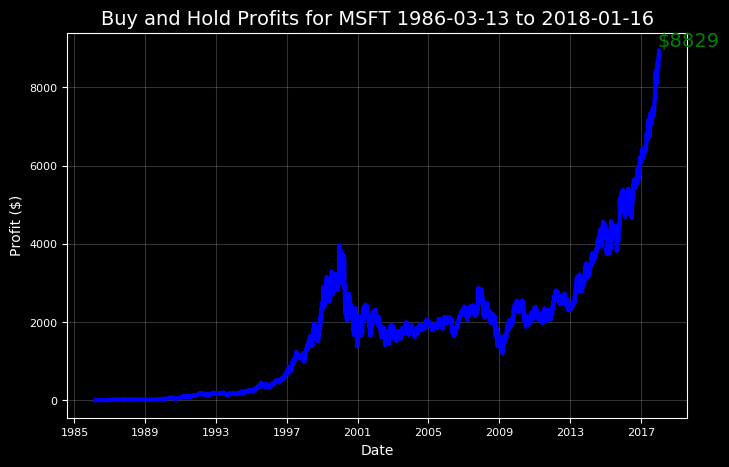

In [ ]:
microsoft.buy_and_hold(start_date='1986-03-13', end_date='2018-01-16', nshares=100)

要是运气不好。。。就白玩了！

MSFT Total buy and hold profit from 1999-01-05 to 2002-01-03 for 100 shares = $-56.92


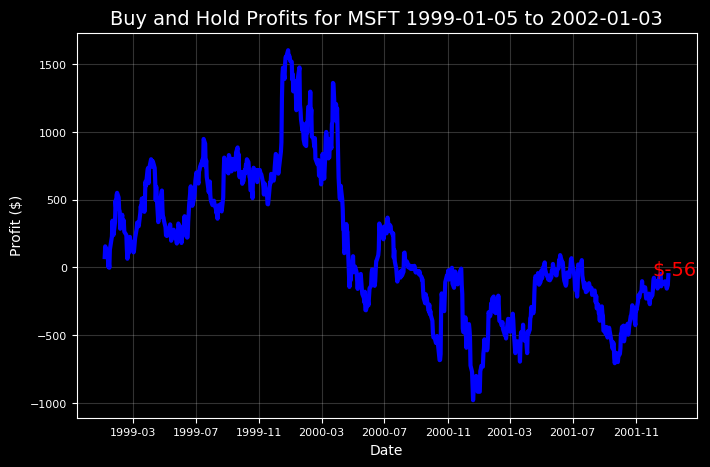

In [ ]:
microsoft.buy_and_hold(start_date='1999-01-05', end_date='2002-01-03', nshares=100)

## prophet登场了

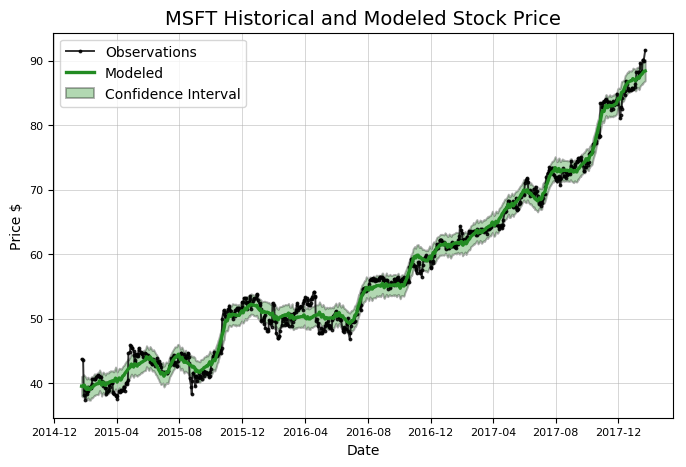

In [ ]:
model, model_data = microsoft.create_prophet_model()

## 趋势情况

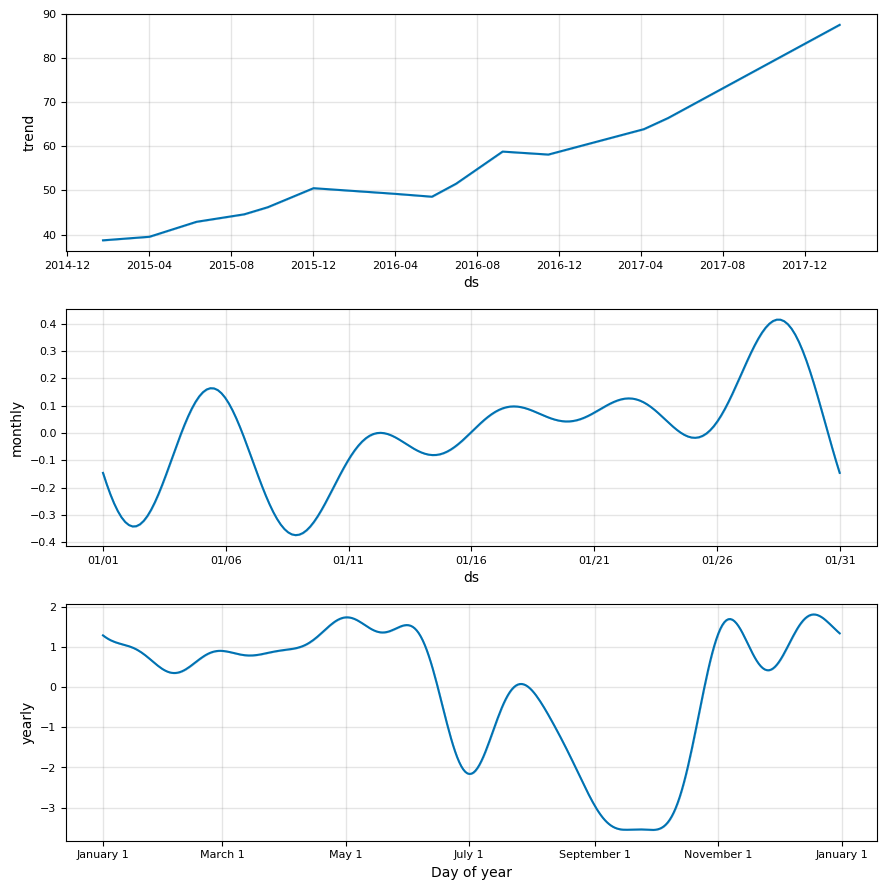

In [ ]:
model.plot_components(model_data)
plt.show()

过去三年，总的趋势显然是向上的。一年的趋势似乎是七月、九月和十月下降，十二月和一月最大增幅。每个月底的时候还是消停的吧！

好像这里面还没显示出星期的趋势，咱们给它加进去

In [ ]:
print(microsoft.weekly_seasonality)
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

False
True


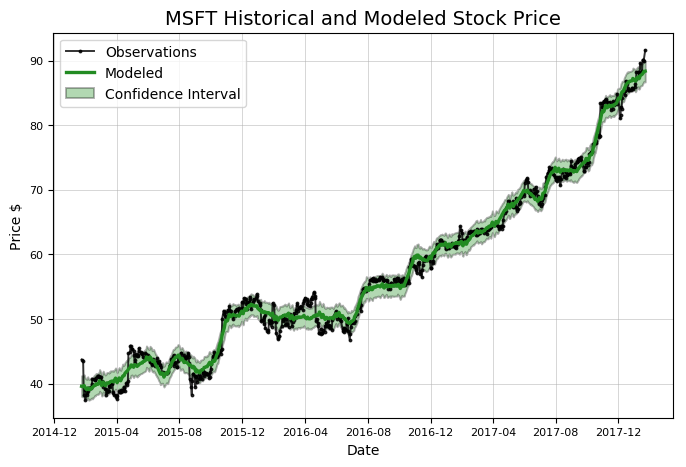

In [ ]:
model, model_data = microsoft.create_prophet_model(days=0)

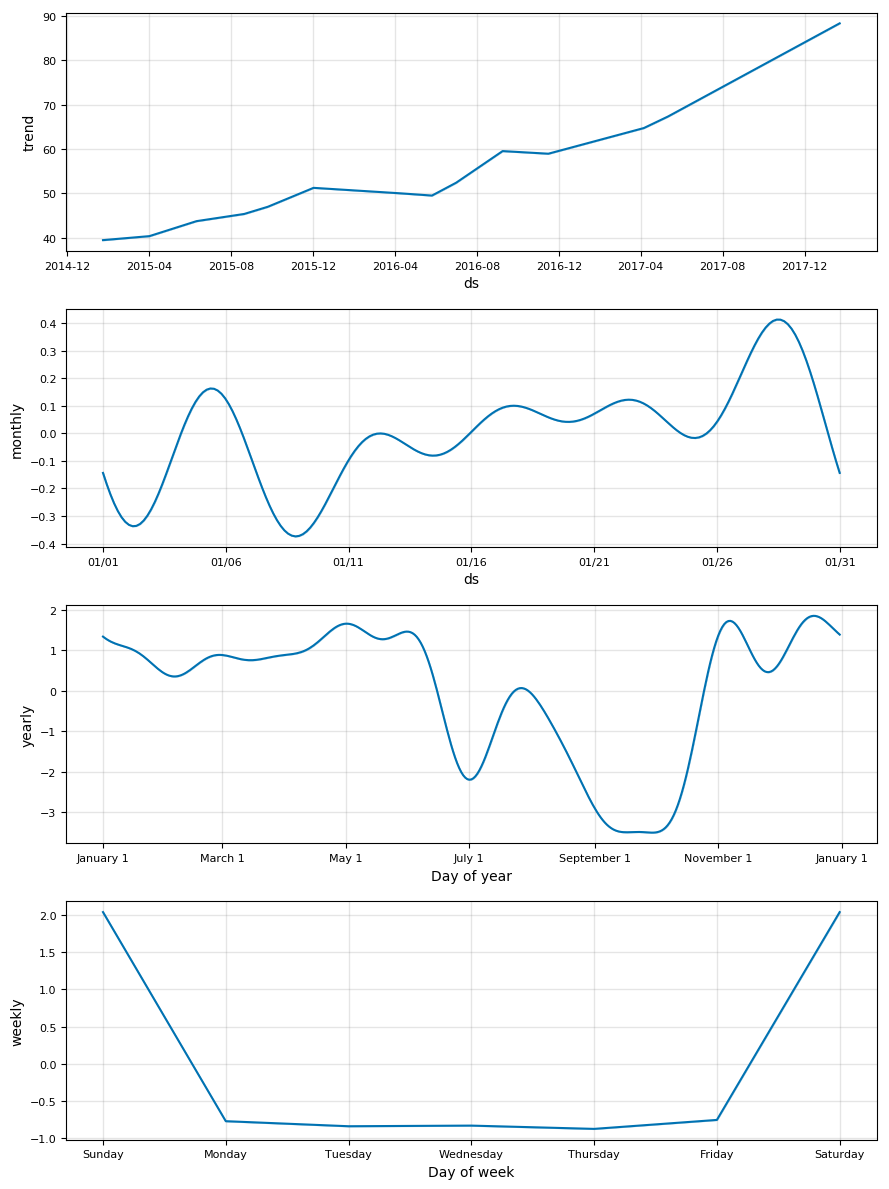

In [ ]:
model.plot_components(model_data)
plt.show()

股票是不是只能工作日买啊，那就是没啥变化啊

In [ ]:
# Turn off the weekly seasonality because it clearly did not work! 
microsoft.weekly_seasonality=False

## 突变点

这里可以找到一些突变点（可以观察二阶导）


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
410 2016-09-08   55.811396 -1.378093
338 2016-05-26   50.113453  1.116720
217 2015-12-02   52.572008 -0.882359
458 2016-11-15   57.589819  0.603127
48  2015-04-02   37.612590  0.442776


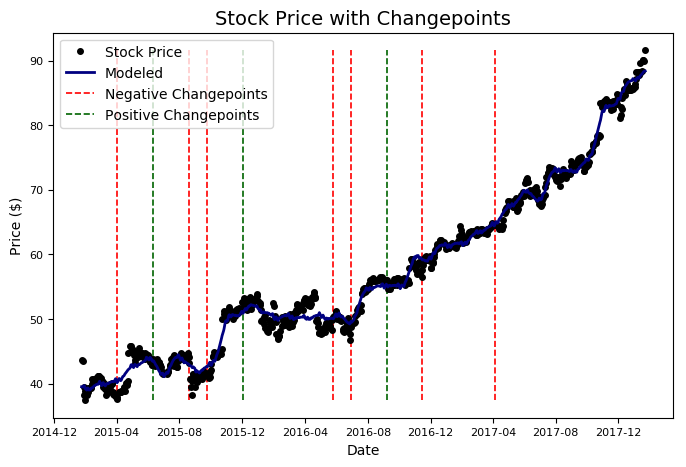

In [ ]:
microsoft.changepoint_date_analysis()

# 预测

Predicted Price on 2018-07-21 = $102.40


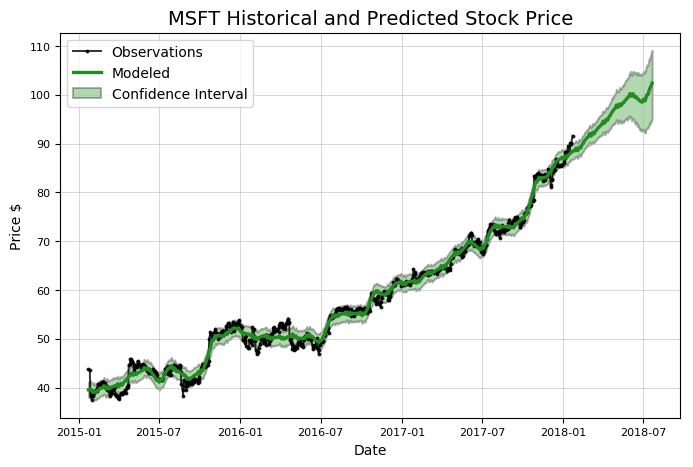

In [ ]:
model, future = microsoft.create_prophet_model(days=180)